Create 100 distributions, look at docs.scipy.org

In [22]:
from __future__ import print_function
__author__= 'mo'

import pylab as pl
import numpy 
import numpy as np
%pylab inline
#numpy.random.randn(10,2000)

Populating the interactive namespace from numpy and matplotlib


In [138]:
#we are creating our distrubutions with randomized data
mymean = 100
distributions = {} #creating empty distributions dictionary

distributions['chisq'] = np.random.chisquare(mymean,100) 
# (df, size) df=degrees of freedom

distributions['normal'] = np.random.normal(mymean,100,100) 
# (loc, scale, size) loc: flt, Mean (“centre”) of the distribution, scale: flt, std ("width" of distr) 

distributions['binomial'] = np.random.binomial(100,0.5,100)
# (n,p,size) n:number of trials, p: prob of success

distributions['poisson'] = np.random.poisson(mymean,100)
# (lam, size) lam: flt, interval, should be >= 0, size: int or tuple of ints

distributions['standard'] = np.random.standard_t(mymean,100)
# (df, size)

distributions['geometric'] = np.random.geometric(0.01,100)
# (p, size)

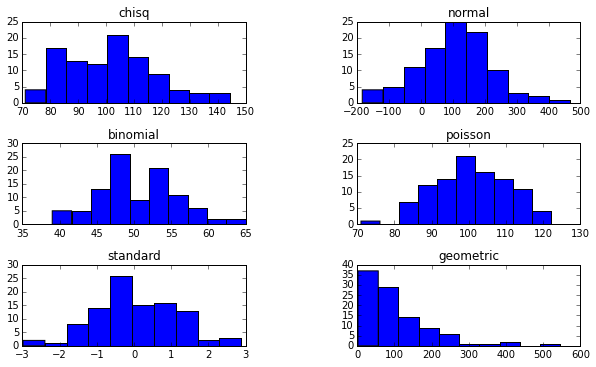

In [139]:
pl.figure(figsize=(10,5))

pl.subplot(3,2,1)
pl.hist(distributions['chisq'])
pl.title('chisq')

pl.subplot(3,2,2)
pl.hist(distributions['normal'])
pl.title('normal')

pl.subplot(3,2,3)
pl.hist(distributions['binomial'])
pl.title('binomial')

pl.subplot(3,2,4)
pl.hist(distributions['poisson'])
pl.title('poisson')

pl.subplot(3,2,5)
pl.hist(distributions['standard'])
pl.title('standard')

pl.subplot(3,2,6)
pl.hist(distributions['geometric'])
pl.title('geometric')

pl.subplots_adjust(wspace=.5, hspace=.5, left=.125, right=.9, top=1, bottom=.1)

In [100]:
#attempting to print the fancy way..not working :(
#print ("Chisq mean: %.2f, standard deviation: %.2f"%(distributions['chisq'].mean(), distributions['chisq'].std()))

In [97]:
print ('chisq')
print (distributions['chisq'].mean())
print (distributions['chisq'].std())

print ('normal')
print (distributions['normal'].mean())
print (distributions['normal'].std())

print ('binomial')
print (distributions['binomial'].mean())
print (distributions['binomial'].std())

print ('poisson')
print (distributions['poisson'].mean())
print (distributions['poisson'].std())

print ('standard')
print (distributions['standard'].mean())
print (distributions['standard'].std())

print ('geometric')
print (distributions['geometric'].mean())
print (distributions['geometric'].std())

chisq
98.6806513182
13.362988789
normal
101.326105118
105.751406459
binomial
49.37
5.10030391251
poisson
100.82
10.2619491326
standard
0.0541727824402
1.11894814843
geometric
1.79
1.19411054765


In [26]:
#plotting all means in a histogram
#pl.hist(distributions['chisq'].mean())

In [27]:
mysizes=1000/(np.array(range(1,100)+[10]))
#lists are evil! they occupy a lot of memory, not efficient

In [28]:
print (mysizes, mysizes.shape)

[1000  500  333  250  200  166  142  125  111  100   90   83   76   71   66
   62   58   55   52   50   47   45   43   41   40   38   37   35   34   33
   32   31   30   29   28   27   27   26   25   25   24   23   23   22   22
   21   21   20   20   20   19   19   18   18   18   17   17   17   16   16
   16   16   15   15   15   15   14   14   14   14   14   13   13   13   13
   13   12   12   12   12   12   12   12   11   11   11   11   11   11   11
   10   10   10   10   10   10   10   10   10  100] (100,)


###Plugging in 'n' for the sample size

In [110]:
distributions['chisq']={} 
#in class we wrote distributions={'chisq':{}}, but that didn't seem to be working...
for n in mysizes:
    distributions['chisq'][n] = np.random.chisquare(mymean,n)
#print statements below are to test that the values were being displayed correctly, will leave them in
#print (distributions['chisq'])
    
distributions['normal']={}
for n in mysizes:
    distributions['normal'][n] = np.random.normal(mymean,100,n)
#print (distributions['normal'])
    
distributions['binomial']={}
for n in mysizes:
    distributions['binomial'][n] = np.random.binomial(100,0.5,n)
#print (distributions['binomial'])

distributions['poisson']={}
for n in mysizes:
    distributions['poisson'][n] = np.random.poisson(10,n)
#print (distributions['poisson'])
    
distributions['standard']={}
for n in mysizes:
    distributions['standard'][n] = np.random.standard_t(mymean,n)
#print (distributions['standard'])
    
distributions['geometric']={}
for n in mysizes:
    distributions['geometric'][n] = np.random.geometric(.01,n)
#print (distributions['geometric'])



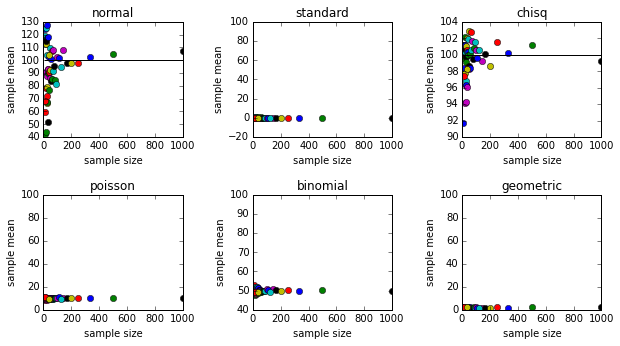

In [111]:
means = {}
means['chisq'] = {}
means['normal'] = {}
means['binomial'] = {}
means['poisson'] = {}
means['standard'] = {}
means['geometric'] = {}

fig_mu_N = pl.figure(figsize=(10,5))
counter = 0
for mydist in distributions:
    counter += 1
    axchisq_mu_N = fig_mu_N.add_subplot(2,3,counter)
    for nn in distributions[mydist]: 
        # calculating and filling in mean values
        means[mydist][nn] = distributions[mydist][nn].mean()
        # now plotting those values
        axchisq_mu_N.plot(nn, distributions[mydist][nn].mean(), 'o')
        axchisq_mu_N.set_xlabel('sample size')
        axchisq_mu_N.set_ylabel('sample mean')
        axchisq_mu_N.plot([min(mysizes), max(mysizes)], [mymean,mymean], 'k')
    axchisq_mu_N.set_title(mydist)
    
pl.subplots_adjust(wspace=0.5,hspace=0.5,
                  left=0.125, right=0.9,
                  top=0.9, bottom=0.1)

In [112]:
#fig_mu_N = pl.figure(figsize=(10,10))
#axchisq_mu_n = fig_mu_N.add_subplot(1,1,1)
#1st plot 
#for nn in distributions['chisq']:
#    axchisq_mu_n.plot(nn, distributions['chisq'][nn].mean(),'o')
#    axchisq_mu_n.set_xlabel('sample size')
#    axchisq_mu_n.set_ylabel('sample mean')
#    axchisq_mu_n.plot([min(mysizes),max(mysizes)],[mymean,mymean],'k')
#keys below are also size of the sample
#plot all of the means into a histogram, it should resemble the gaussian distribution

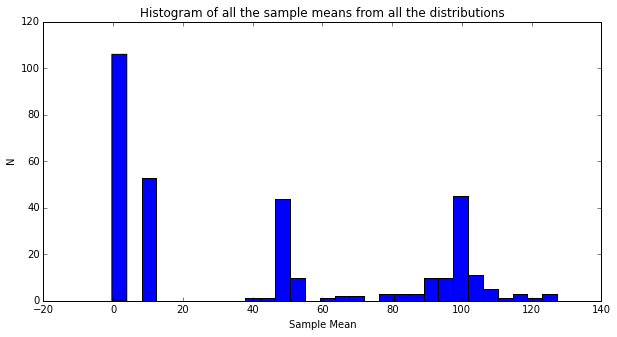

In [137]:
allmeans = []

for mydist in means:
    for n in means[mydist]:
        allmeans.append(means[mydist][n])

#print (allmeans)
std_allmeans = np.std(allmeans)
pl.figure(figsize=(10,5))
pl.hist(allmeans,bins=30)
pl.xlabel('Sample Mean')
pl.ylabel('N')
pl.title('Histogram of all the sample means from all the distributions')

###Optional: Now trying to fit to a gaussian distribution, from http://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html

(array([ 0.00108189,  0.00072126,  0.00360629,  0.00324566,  0.00540943,
         0.00829446,  0.0100976 ,  0.00577006,  0.00396691,  0.00288503]),
 array([-131.66258884, -109.47909954,  -87.29561025,  -65.11212095,
         -42.92863165,  -20.74514235,    1.43834695,   23.62183625,
          45.80532555,   67.98881484,   90.17230414]),
 <a list of 10 Patch objects>)

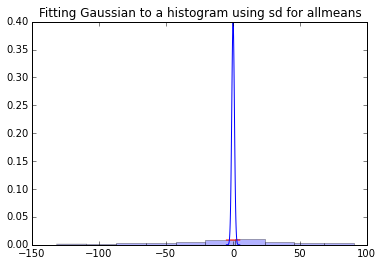

In [132]:
from scipy.stats import norm

# picking 150 of from a normal distrubution
# with mean 0 and standard deviation 1
#samp = norm.rvs(loc=0,scale=1,size=n) 
#we need to plug in our distribution of means here
samp = norm.rvs(loc=0,scale=std_allmeans,size=n) 
param = norm.fit(samp) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = linspace(-5,5,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Fitting Gaussian to a histogram using sd for allmeans')
plot(x,pdf_fitted,'r-',x,pdf,'b-')
pl.hist(samp,normed=1,alpha=.3)
